# Column space

The function `in_column_space` checks if a vector is in the column space of a matrix. Don't worry about how it is implemented for now.

In [ ]:
import numpy as np
import sympy

def in_column_space(b, A):
  '''
  Checks for membership in a column space.

  Parameters:
  b : 1D array
    m-vector b
  A : 2D array
    m-by-n matrix

  Returns:
  t : bool
    membership status of b in column space of A
  x : ndarray or NoneType
    if t is True, then x is 1D array of coefficients that witnesses the membership
    if t is False, then x is None
  '''
  try:
    sol, params = sympy.Matrix(A).gauss_jordan_solve(sympy.Matrix(b))
  except ValueError:
    return (False, None)
  return (True, np.array(sol.xreplace({ f:0 for f in params })).astype(np.float64).flatten())

Here is how to use it:

In [ ]:
A = np.array([[1,2,3],[2,4,6],[3,4,5],[4,4,4]]).T     # A is a 3x4 matrix
# without the .T, A will be row-oriented
print(A)

[[1 2 3 4]
 [2 4 4 4]
 [3 6 5 4]]


In [ ]:
t, x = in_column_space(np.array([2,2,1]), A)
if t:
  print(x)
else:
  print('Not in column space')

Not in column space


In [ ]:
t, x = in_column_space(A[:,0], A)
if t:
  print(x)
else:
  print('Not in column space')

[1. 0. 0. 0.]


Let us verify...

In [ ]:
np.array_equal(A @ x, A[:,0])

True

# CR factorization

The greedy algorithm for CR factorization greedily selects a linearly independent subset of columns from a matrix. It also returns a "transcript" of the execution of this greedy process.

In [ ]:
def greedy_cr(A):
  '''
  Greedy algorithm for CR factorization

  Parameter:
  A : 2D array
    m-by-n matrix

  Returns:
  C : 2D array
    linearly independent columns of A
  R : 2D array
    RREF matrix R such that A = CR
  '''
  C = np.ndarray((A.shape[0], 0))                        # initialize C to an m-by-0 matrix
  R = np.ndarray((0, 0))                                 # initialize R to a 0-by-0 matrix
  for k in range(A.shape[1]):
    (t, x) = in_column_space(A[:,k], C)                  # check if A[:,k] is in column space of C
    if t:
      R = np.column_stack((R, x))                        # append to R the column of coefficients witnessing membership of A[:,k] in column space of C
    else:
      C = np.column_stack((C, A[:,k]))                   # append to C the current column of A
      R = np.row_stack((R, np.zeros((1, R.shape[1]))))   # append to R a row of 0s
      R = np.column_stack((R, np.eye(C.shape[1])[:,-1])) # append to R a column where the last component is a 1 and other components are 0
  return C, R

In [ ]:
C, R = greedy_cr(A)
print(C)
print(R)

[[-1.  1.  0.]
 [ 0. -1.  1.]
 [-1.  0.  1.]
 [ 0.  0. -1.]
 [-1.  0.  0.]]
[[ 1.  0.  0. -1.]
 [ 0.  1.  0. -1.]
 [ 0.  0.  1. -1.]]


In [ ]:
print(A)
PS6 = np.array([
  [0,0,1,0],
  [0,0,0,1],
  [0,0,0,0]   
])
PS62 = np.array([
  [0,0,0,0],
  [0,0,1,1],
  [0,0,0,0]   
])
print(C@PS6)
print(C@PS62)

[[-1  1  0  0]
 [ 0 -1  1  0]
 [-1  0  1  0]
 [ 0  0 -1  1]
 [-1  0  0  1]]
[[ 0.  0. -1.  1.]
 [ 0.  0.  0. -1.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -1.  0.]]
[[ 0.  0.  1.  1.]
 [ 0.  0. -1. -1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [ ]:
PS3A = np.array([
    [2, -2, 1, 6, 0],
    [1, -1, 0, 2, 0],
    [3, -3, 0, 6, 1]]).T
C, R = greedy_cr(PS3A)
print(C)
print(R)
print(C@R)

[[ 2.  1.  3.]
 [-2. -1. -3.]
 [ 1.  0.  0.]
 [ 6.  2.  6.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 2.  1.  3.]
 [-2. -1. -3.]
 [ 1.  0.  0.]
 [ 6.  2.  6.]
 [ 0.  0.  1.]]


In [ ]:
PS3A = np.array([
    [0, 0, 1],
    [0, 0, 0],
    [0, 0, 0]
    ])
C, R = greedy_cr(PS3A)
print(C)
print(R)
print(C@R)

[[1.]
 [0.]
 [0.]]
[[0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
PS3A = np.array([
    [0, 1],
    [0, 1]
    ])
C, R = greedy_cr(PS3A)
print(C)
print(R)
print(C@R)

[[1.]
 [1.]]
[[0. 1.]]
[[0. 1.]
 [0. 1.]]


In [ ]:
print(C @ R)

[[0. 1.]
 [0. 1.]]


# Incidence matrix

An incidence matrix can be automatically created from a graph. There is a nice Python library called networkx that facilitates this.

In [ ]:
import networkx as nx

vertices = [1,2,3,4]
edges = [[1,2], [2,3], [1,3], [3,4], [1,4]] # remember, we have arbitrarily imposed a direction on each edge
G = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
G.add_nodes_from(vertices) # "nodes" = "vertices"
G.add_edges_from(edges)
A = nx.incidence_matrix(G, oriented=True).T.todense()
print(A)

[[-1.  1.  0.  0.]
 [-1.  0.  1.  0.]
 [-1.  0.  0.  1.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]


In [ ]:
vertices = [1,2,3,4,5,6]
edges = [[1,2], [1,6], [2,3], [3,4], [3,6], [5,2], [5,4], [6,5]] # remember, we have arbitrarily imposed a direction on each edge
G = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
G.add_nodes_from(vertices) # "nodes" = "vertices"
G.add_edges_from(edges)
A = nx.incidence_matrix(G, oriented=True).T.todense()
print(A)

[[-1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  1.]
 [ 0. -1.  1.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1.]
 [ 0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  1. -1.]]


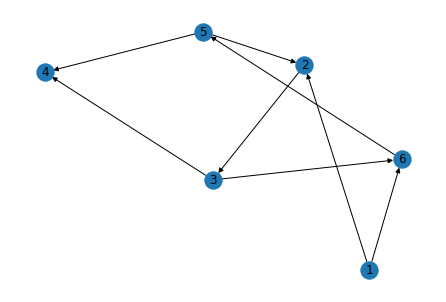

In [ ]:
nx.draw(G, with_labels=True)

The edges are numbered differently from how they are numbered in the notes.

Here is the incidence matrix from the notes:

In [ ]:
A = np.array([[-1, 1, 0, 0], [0, -1, 1, 0], [-1, 0, 1, 0], [0, 0, -1, 1], [-1, 0, 0, 1]])
print(A)

[[-1  1  0  0]
 [ 0 -1  1  0]
 [-1  0  1  0]
 [ 0  0 -1  1]
 [-1  0  0  1]]


In [ ]:
print('rank of A:', np.linalg.matrix_rank(A))

rank of A: 3


## Paths and cycles

Path using edges 1, 3, and 5:

In [ ]:
print([1,1,0,1,0] @ A)

[-1  0  0  1]


This path takes us from vertex 1 to vertex 4.

Path using edges 2, 4, and 5 (but using edge 5 in reverse direction):

In [ ]:
print([0,1,0,1,-1] @ A)

[ 1 -1  0  0]


This path takes us from vertex 2 to vertex 1.

Path (cycle) using edges 1, 2, 4, and 5 (but using edge 5 in reverse direction):

In [ ]:
print([1,1,0,1,-1] @ A)

[0 0 0 0]


This is, indeed, a cycle!

In [ ]:
vertices = [1,2,3,4,5,6]
edges = [[1,2], [1,6], [2,3], [3,4], [3,6], [5,2], [5,4], [6,5]] # remember, we have arbitrarily imposed a direction on each edge
G = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
G.add_nodes_from(vertices) # "nodes" = "vertices"
G.add_edges_from(edges)
PS33 = nx.incidence_matrix(G, oriented=True).T.todense()
print([0,1,0,1,-1,0,0,0] @ PS33)

[[-1.  0.  0.  1.  0.  0.]]


## Spanning tree via CR factorization

The row-wise CR factorization of the incidence matrix gives us a spanning tree.

In [ ]:
C, R = greedy_cr(A.T)
print(R.T)
print(C.T)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [0. 0. 1.]
 [1. 1. 1.]]
[[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]


[[-1.  1.  0.  0.]
 [ 0. -1.  1.  0.]
 [ 0.  0. -1.  1.]]
[-1.  1.  0.  0.]
[ 0. -1.  1.  0.]
[ 0.  0. -1.  1.]
[[1, 2], [2, 3], [3, 4]]


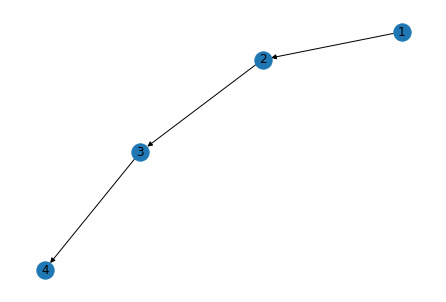

In [ ]:
# Use networkx again to show the acyclic subgraph
vertices = [1,2,3,4]

print(C.T)

# construct edges from C.T
edges = [] 

for edge in C.T:

    print(edge)
    out = np.where(edge == -1)[0][0] + 1
    inc = np.where(edge == 1)[0][0] + 1
    edges.append([out, inc])

print(edges)

subG = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
subG.add_nodes_from(vertices) # "nodes" = "vertices"
subG.add_edges_from(edges)

# Draw the spanning tree
nx.draw(subG, with_labels=True)

Edges 1, 2, and 4 were selected for inclusion in the spanning tree.

In [ ]:
C, R = greedy_cr(PS33.T)
print(PS33)

# print(R)
# print(R.shape)
# print(C)
# print(C.shape)

[[-1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  1.]
 [ 0. -1.  1.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1.]
 [ 0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  1. -1.]]


In [ ]:
# Use networkx again to show the acyclic subgraph
vertices = [1,2,3,4,5,6]

print(C.T)

# construct edges from C.T
edges = [] 
for edge in C.T:
    out = np.where(edge == -1)[0][0] + 1
    inc = np.where(edge == 1)[0][0] + 1
    edges.append([out, inc])
    
print(edges)

subG = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
subG.add_nodes_from(vertices) # "nodes" = "vertices"
subG.add_edges_from(edges)

# Draw the spanning tree
# nx.draw(subG, with_labels=True)

[[-1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  1.]
 [ 0. -1.  1.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.]]
[[1, 1], [1, 1], [1, 1], [1, 1], [1, 1]]


[[-1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  1.]
 [ 0. -1.  1.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.]]
[[ 1.  0.  0.  0. -1.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  0. -1.]
 [ 0.  0.  1.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  1. -1.]]
[[1, 2], [1, 6], [2, 3], [3, 4], [5, 2]]


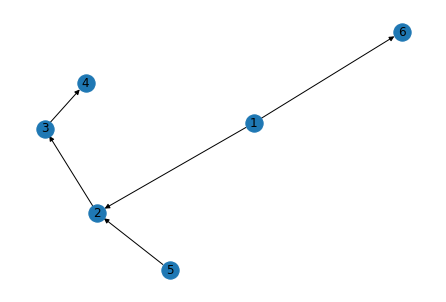

In [ ]:
PS33B = np.array([
    [-1,1,0,0,0,0],
    [-1,0,0,0,0,1],
    [0,-1,1,0,0,0],
    [0,0,-1,1,0,0],
    [0,0,-1,0,0,1],
    [0,1,0,0,-1,0],
    [0,0,0,1,-1,0],
    [0,0,0,0,1,-1],
])

C, R = greedy_cr(PS33B.T)

print(C.T)
print(R)

# construct edges from C.T
edges = [] 
for edge in C.T:
    out = np.where(edge == -1)[0][0] + 1
    inc = np.where(edge == 1)[0][0] + 1
    edges.append([out, inc])
    
print(edges)

subG = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
subG.add_nodes_from(vertices) # "nodes" = "vertices"
subG.add_edges_from(edges)

# Draw the spanning tree
nx.draw(subG, with_labels=True)

[[ 0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  1. -1.  0.]
 [ 0.  0. -1.  0.  0.  1.]
 [-1.  0.  0.  0.  0.  1.]]
[[5, 2], [6, 5], [5, 4], [3, 6], [1, 6]]


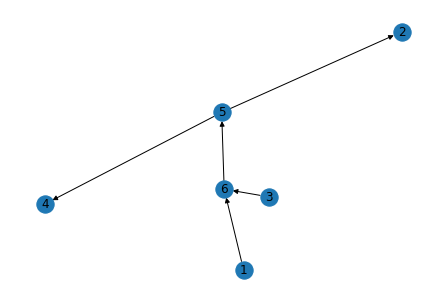

In [ ]:
PS33B = np.array([
    [0,1,0,0,-1,0],
    [0,0,0,0,1,-1],
    [0,0,0,1,-1,0],
    [0,0,-1,0,0,1],
    [0,0,-1,1,0,0],
    [0,-1,1,0,0,0],
    [-1,0,0,0,0,1],
    [-1,1,0,0,0,0]
])

C, R = greedy_cr(PS33B.T)

# Use networkx again to show the acyclic subgraph
vertices = [1,2,3,4,5,6]

print(C.T)

# construct edges from C.T
edges = [] 
for edge in C.T:
    out = np.where(edge == -1)[0][0] + 1
    inc = np.where(edge == 1)[0][0] + 1
    edges.append([out, inc])
    
print(edges)

subG = nx.DiGraph() # "DiGraph" = "directed graph" = graph with directed edges.
subG.add_nodes_from(vertices) # "nodes" = "vertices"
subG.add_edges_from(edges)

# Draw the spanning tree
nx.draw(subG, with_labels=True)